In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv

In [89]:
with open('Homework3Data597.csv', mode = "r") as qualData:     #Importing data from CSV file
    qualData = csv.reader(qualData)
    qualData = pd.DataFrame(qualData)

qualData = qualData.tail(-1)
mapping = {qualData.columns[21]: 'Depression', qualData.columns[23]: 'Female', qualData.columns[24]: 'Age', qualData.columns[25]: 'Educ', qualData.columns[28]: 'Income', qualData.columns[30]: 'Attend', qualData.columns[29]: 'Married', qualData.columns[31]: 'Unemployed', qualData.columns[27]: 'Black', qualData.columns[26]: 'Hispanic'}
qualData = qualData.rename(columns=mapping)

print(qualData)

         0    1    2    3    4    5    6    7    8    9  ... Hispanic Black  \
1        2  3.0  1.0  2.0  3.0  4.0  2.0  1.0  3.0  3.0  ...      0.0   0.0   
2        3  2.0  2.0  2.0  3.0  2.0  2.0  2.0  3.0  2.0  ...      0.0   0.0   
3        4  3.0  3.0  4.0  2.0  2.0  4.0  2.0  3.0  2.0  ...      0.0   0.0   
4        5  3.0  2.0  3.0  2.0  3.0  1.0  3.0  2.0  3.0  ...      0.0   1.0   
5        6  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  ...      0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   ...   
1010  1011  2.0  1.0  4.0  2.0  1.0  4.0  3.0  4.0  4.0  ...      0.0   0.0   
1011  1012  1.0  1.0  2.0  2.0  1.0  1.0  2.0  3.0  2.0  ...      0.0   0.0   
1012  1013  3.0  1.0  3.0  1.0  3.0  2.0  3.0  1.0  1.0  ...      0.0   0.0   
1013  1014  2.0  2.0  2.0  1.0  3.0  3.0  2.0  2.0  2.0  ...      0.0   0.0   
1014  1015  3.0  1.0  1.0  4.0  3.0  3.0  2.0  4.0  3.0  ...      0.0   0.0   

     Income Married Attend Unemployed          32  

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = qualData[["Depression", "Female", "Age", "Educ", "Income", "Attend", "Married", "Unemployed", "Black", "Hispanic"]]
y = qualData[[22]] #Voter turnout is the target variable

sc = StandardScaler()                  #Scale Data
sc.fit(X)
X_std = sc.transform(X)

X_std = pd.DataFrame(X_std)
X_std2 = X_std[[1, 2, 3, 4, 7, 8, 9]]


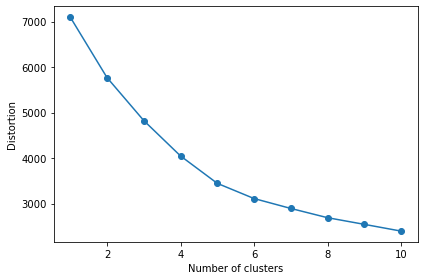

In [91]:
# Based on within-cluster SSE, find the "elbow"

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_std2)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [94]:
km = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X_std2)

X_std_cl = pd.DataFrame()
X = pd.DataFrame(X)
X_std_cl['Cluster'] = y_km
X_std_cl['Depression'] = X_std[[0]]   #NEED TO FIND COLUMN ID
X_std_cl['Attend'] = X_std[[5]]
X_std_cl['Married'] = X_std[[6]]

X_train, X_test, y_train, y_test = train_test_split(X_std_cl, y, test_size = 0.3, random_state = 1)   #Split Data

In [95]:
#Model as Shown in Original Paper

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LogisticRegression()              #Logistic Regression
sc = StandardScaler()                  #Scale Data

sc.fit(X)
X = sc.transform(X)
y = np.ravel(y)

lr.fit(X, y)

# Make predictions on the test data                        
y_pred = lr.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nLogistic Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Logistic Regression:
Mean Squared Error: 0.29
R-squared: -0.27


In [96]:
#Make Predictions on Training Set

y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)

y_train.dropna
X_train.dropna

lr = LogisticRegression()                                #Logistic Regression
y_train = np.ravel(y_train)
lr.fit(X_train, y_train)

print("Logistic Regression Training Accuracy:", lr.score(X_train, y_train))


Logistic Regression Training Accuracy: 0.68688293370945


In [97]:
# Make predictions on the test data                       
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLogistic Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Logistic Regression:
Mean Squared Error: 0.28
R-squared: -0.23
